In [30]:
from cleanfid import fid
import os
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
#result_path = "experiments/sr_ffhq_230501_171406/results"
#avg_fid =  fid.compute_fid(result_path+"/hr",result_path+"/sr",num_workers=0)
#c_fid =  fid.compute_fid(result_path+"/hr",result_path+"/sr",num_workers=0,mode = "clean")
#img = plt.imread(result_path+"/hr/0_1_hr.png",0)
# show image
#print(os.listdir(result_path+"/hr"))

In [31]:
linear_start, linear_end = 1e-4,2e-2
n_timestep = 1000
cosine_s=8e-3
timesteps = (
            torch.arange(n_timestep + 1, dtype=torch.float64) /
            n_timestep + cosine_s
        )
alphas = timesteps / (1 + cosine_s) * math.pi / 2
alphas = torch.cos(alphas).pow(2)
alphas = alphas / alphas[0]
betas = 1 - alphas[1:] / alphas[:-1]
Betas = betas.clamp(max=0.999)
linear_betas = np.linspace(linear_start, linear_end,
                            n_timestep, dtype=np.float64)
lin_alphas = 1. - linear_betas
alphas_cumprod = np.cumprod(alphas, axis=0)
lin_alphas_cumprod = np.cumprod(lin_alphas, axis=0)

In [32]:
def betas_for_alpha_bar(num_diffusion_timesteps, alpha_bar, max_beta=0.999):
    """
    Create a beta schedule that discretizes the given alpha_t_bar function,
    which defines the cumulative product of (1-beta) over time from t = [0,1].

    :param num_diffusion_timesteps: the number of betas to produce.
    :param alpha_bar: a lambda that takes an argument t from 0 to 1 and
                      produces the cumulative product of (1-beta) up to that
                      part of the diffusion process.
    :param max_beta: the maximum beta to use; use values lower than 1 to
                     prevent singularities.
    """
    betas = []
    for i in range(num_diffusion_timesteps):
        t1 = i / num_diffusion_timesteps
        t2 = (i + 1) / num_diffusion_timesteps
        betas.append(min(1 - alpha_bar(t2) / alpha_bar(t1), max_beta))
    return np.array(betas)
cos_b = betas_for_alpha_bar(
           n_timestep,
            lambda t: math.cos((t + 0.008) / 1.008 * math.pi / 2) ** 2,
        )
c_alphas = 1. - cos_b
c_alphas_cumprod = np.cumprod(c_alphas, axis=0)

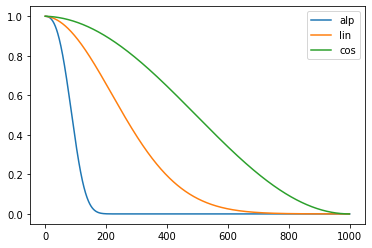

In [33]:
plt.plot(alphas_cumprod,label = "cosine mod")
plt.plot(lin_alphas_cumprod,label = "linear")
plt.plot(c_alphas_cumprod,label = "cosine")
plt.xlabel("diffusion steps")
plt.ylabel("alpha cumprod")
plt.legend()
plt.show()

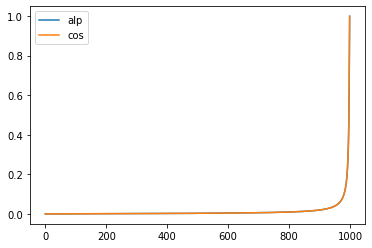

In [34]:
plt.plot(Betas,label = "alp")
#plt.plot(linear_betas,label = "lin")
plt.plot(cos_b,label = "cos")
plt.legend()
plt.show()

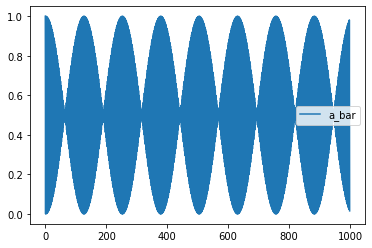

In [35]:
T = np.arange(1000)
a_bar = np.cos((T + 0.008) / 1.008 * math.pi / 2) ** 2
plt.plot(a_bar ,label = "a_bar")
plt.legend()
plt.show()